# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [1]:
%matplotlib inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cft
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import pandas as pd
import copy
import math
from collections import OrderedDict
import IPython.display
from dask.distributed import Client
import cartopy.crs as ccrs
def arange(start,end,stride=1):
    return np.arange(start,end+0.00000001,stride)
from scipy import stats

import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))  # so we can import ../exptdata
import exptdata
print('Available exptdata keys: ', [k for k in exptdata.exptdict.keys()])


netcdf_index loaded.
Available exptdata keys:  ['1deg', '025deg', '01deg']


In [2]:
#cc.start_cluster()
client = Client()
client

Client Scheduler: tcp://127.0.0.1:37667 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 8 Memory: 33.67 GB


In [36]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [37]:
# use common start and end dates for all runs
tstart = exptdata.clim_tstart
tend = exptdata.clim_tend

lonW = 90.0
lonE = 180.0
latS = -70.0
latN = 20.0

firstyear = pd.to_datetime(tstart).year  # assumes tstart is 1 January!
lastyear = pd.to_datetime(tend).year-1  # assumes tend is 1 January!
yearrange = str(firstyear)+'-'+str(lastyear)
print(yearrange)
print('tstart = ', tstart)
print('tend = ', tend)

output_dir = '/home/561/erd561/figures/Australia/'
fig_name = nb_name[:-6]
fig_dir = output_dir + fig_name

output_ls = os.listdir(output_dir)
if fig_name not in output_ls:
    os.mkdir(fig_dir) 

1993-2017
tstart =  1993-01-01 00:00:00
tend =  2018-01-01 00:00:00


In [5]:
input_path_obs = '/g/data/e14/erd561/NOAA_OI_SST_V2/'

input_path_mod = '/g/data/e14/erd561/access-om2/'

In [6]:
sst_obs = xr.open_dataset(input_path_obs + 'sst.nc').sst
print(sst_obs)
sst_slopes_obs = xr.open_dataset(input_path_obs + 'sst_slopes.nc').sst_slopes
print(sst_slopes_obs)

sst_1_obs = xr.open_dataset(input_path_obs + 'sst_1.nc').sst_1
print(sst_1_obs)
sst_1_slopes_obs = xr.open_dataset(input_path_obs + 'sst_1_slopes.nc').sst_1_slopes
print(sst_1_slopes_obs)

sst_025_obs = xr.open_dataset(input_path_obs + 'sst_025.nc').sst_025
print(sst_025_obs)
sst_025_slopes_obs = xr.open_dataset(input_path_obs + 'sst_025_slopes.nc').sst_025_slopes
print(sst_025_slopes_obs)

sst_01_obs = xr.open_dataset(input_path_obs + 'sst_01.nc').sst_01
print(sst_01_obs)
sst_01_slopes_obs = xr.open_dataset(input_path_obs + 'sst_01_slopes.nc').sst_01_slopes
print(sst_01_slopes_obs)

sst_1_mod = xr.open_dataset(input_path_mod + 'sst_1.nc').sst_1-273.15
print(sst_1_mod)
sst_1_slopes_mod = xr.open_dataset(input_path_mod + 'sst_1_slopes.nc').sst_1_slopes
print(sst_1_slopes_mod)

sst_025_mod = xr.open_dataset(input_path_mod + 'sst_025.nc').sst_025-273.15
print(sst_025_mod)
sst_025_slopes_mod = xr.open_dataset(input_path_mod + 'sst_025_slopes.nc').sst_025_slopes
print(sst_025_slopes_mod)

sst_01_mod = xr.open_dataset(input_path_mod + 'sst_01.nc').sst_01-273.15
print(sst_01_mod)
sst_01_slopes_mod = xr.open_dataset(input_path_mod + 'sst_01_slopes.nc').sst_01_slopes
print(sst_01_slopes_mod)

<xarray.DataArray 'sst' (lat: 94, lon: 94, year: 25)>
[220900 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * lon      (lon) float32 -271.5 -270.5 -269.5 -268.5 ... -180.5 -179.5 -178.5
  * year     (year) int64 1993 1994 1995 1996 1997 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'sst_slopes' (lat: 94, lon: 94)>
array([[      nan,       nan,       nan, ..., -0.002417, -0.003224, -0.003263],
       [      nan,       nan,       nan, ..., -0.004445, -0.005615, -0.005914],
       [      nan,       nan,       nan, ..., -0.005962, -0.007229, -0.007749],
       ...,
       [ 0.008761,  0.010363,  0.011421, ...,  0.022318,  0.020954,  0.02089 ],
       [ 0.004672,  0.006404,  0.00687 , ...,  0.020776,  0.019219,  0.0194  ],
       [-0.000127,  0.000919, -0.00071 , ...,  0.019156,  0.017395,  0.017758]])
Coordinates:
  * lat      (lat) float32 -71.5 -70.5 -69.5 -68.5 -67.5 ... 18.5 19.5 20.5 21.5
  * lon      (lon) 

In [7]:
straits_01deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-244.3, -243.8, -8.37, -8.37]),
            ('Ombai Strait',  [-234.9, -234.9, -8.86, -8.27]),
            ('Timor Strait',  [-232.6, -232.6, -13.96, -8.37])
            ])
straits_025deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-244.5, -243.5, -8.22, -8.22]),
            ('Ombai Strait',  [-235.5, -235.5, -9.21, -8.47]),
            ('Timor Strait',  [-233, -233, -13.86, -8.71])
            ])
straits_1deg = OrderedDict([ # use OrderedDict so panels are produced in a reproducible order
            ('Lombok Strait', [-245, -242, -8.33, -8.33]),
            ('Ombai Strait',  [-237, -237, -10.33, -8.33]),
            ('Timor Strait',  [-233, -233, -13.9, -9])
            ])


lonW_LC = 110
lonE_LC = 119
latS_LC = -34
latN_LC = -20

latN_157E = -20

lonW_EAC = 147
lonE_EAC = 157
latS_EAC = -47
latN_EAC = -33

In [8]:
sst_LC = xr.open_dataset(input_path_obs + 'sst_LC.nc').sst_LC
print(sst_LC)
sst_1_LC = xr.open_dataset(input_path_mod + 'sst_1_LC.nc').sst_1_LC
print(sst_1_LC)
sst_025_LC = xr.open_dataset(input_path_mod + 'sst_025_LC.nc').sst_025_LC
print(sst_025_LC)
sst_01_LC = xr.open_dataset(input_path_mod + 'sst_01_LC.nc').sst_01_LC
print(sst_01_LC)
sst_JRA_LC = xr.open_dataset(input_path_mod + 'sst_JRA_LC.nc').sst_JRA_LC
print(sst_JRA_LC)

<xarray.DataArray 'sst_LC' (year: 37)>
array([22.463955, 22.9763  , 22.970453, 22.596972, 21.891161, 22.301512,
       23.047176, 23.065908, 22.304474, 22.376787, 22.248499, 21.881594,
       22.770557, 22.843096, 23.089344, 22.668259, 23.096334, 23.584162,
       23.242346, 22.670536, 22.372091, 22.315914, 22.205128, 22.34758 ,
       22.443483, 22.616913, 23.041857, 22.551168, 22.805937, 23.58909 ,
       23.12825 , 23.165182, 22.885855, 22.995302, 22.135845, 22.201862,
       22.041538], dtype=float32)
Coordinates:
  * year     (year) int64 1982 1983 1984 1985 1986 ... 2014 2015 2016 2017 2018
<xarray.DataArray 'sst_1_LC' (year: 300)>
array([22.286255, 22.00528 , 21.520203, ..., 22.318146, 21.884735, 21.873077],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'sst_025_LC' (year: 300)>
array([21.920685, 21.85968 , 21.236267, ..., 22.014923, 21.562256, 21.592651],
      dtype=float32)
Coordinates:
  * 

In [9]:
sst_EAC = xr.open_dataset(input_path_obs + 'sst_EAC.nc').sst_EAC
print(sst_EAC)
sst_1_EAC = xr.open_dataset(input_path_mod + 'sst_1_EAC.nc').sst_1_EAC
print(sst_1_EAC)
sst_025_EAC = xr.open_dataset(input_path_mod + 'sst_025_EAC.nc').sst_025_EAC
print(sst_025_EAC)
sst_01_EAC = xr.open_dataset(input_path_mod + 'sst_01_EAC.nc').sst_01_EAC
print(sst_01_EAC)
sst_JRA_EAC = xr.open_dataset(input_path_mod + 'sst_JRA_EAC.nc').sst_JRA_EAC
print(sst_JRA_EAC)

<xarray.DataArray 'sst_EAC' (year: 37)>
array([16.307743, 15.994451, 16.007574, 16.384548, 16.26546 , 16.33474 ,
       16.619678, 16.956247, 16.637419, 16.303984, 16.233488, 16.448383,
       15.996965, 15.851464, 15.80007 , 16.4649  , 16.707935, 17.019768,
       16.779787, 17.141195, 16.803822, 16.702295, 16.317692, 16.926527,
       16.529512, 16.955814, 16.433882, 16.490053, 17.00011 , 16.756447,
       16.647795, 17.090094, 17.291588, 17.192186, 17.571009, 17.516544,
       17.136072], dtype=float32)
Coordinates:
  * year     (year) int64 1982 1983 1984 1985 1986 ... 2014 2015 2016 2017 2018
<xarray.DataArray 'sst_1_EAC' (year: 300)>
array([15.958466, 16.598175, 16.10376 , ..., 15.593475, 16.036102, 16.056915],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'sst_025_EAC' (year: 300)>
array([16.075256, 16.378632, 16.029877, ..., 16.279053, 16.62909 , 16.66092 ],
      dtype=float32)
Coordinates:
 

In [10]:
trans_Lombok_1 = xr.open_dataset(input_path_mod + 'trans_Lombok_1.nc').trans_Lombok_1/1e6/1036
print(trans_Lombok_1)
trans_Lombok_025 = xr.open_dataset(input_path_mod + 'trans_Lombok_025.nc').trans_Lombok_025/1e6/1036
print(trans_Lombok_025)
trans_Lombok_01 = xr.open_dataset(input_path_mod + 'trans_Lombok_01.nc').trans_Lombok_01/1e6/1036
print(trans_Lombok_01)
trans_Lombok_JRA = xr.open_dataset(input_path_mod + 'trans_Lombok_JRA.nc').trans_Lombok_JRA/1e6/1036
print(trans_Lombok_JRA)

trans_Ombai_1 = xr.open_dataset(input_path_mod + 'trans_Ombai_1.nc').trans_Ombai_1/1e6/1036
print(trans_Ombai_1)
trans_Ombai_025 = xr.open_dataset(input_path_mod + 'trans_Ombai_025.nc').trans_Ombai_025/1e6/1036
print(trans_Ombai_025)
trans_Ombai_01 = xr.open_dataset(input_path_mod + 'trans_Ombai_01.nc').trans_Ombai_01/1e6/1036
print(trans_Ombai_01)
trans_Ombai_JRA = xr.open_dataset(input_path_mod + 'trans_Ombai_JRA.nc').trans_Ombai_JRA/1e6/1036
print(trans_Ombai_JRA)

trans_Timor_1 = xr.open_dataset(input_path_mod + 'trans_Timor_1.nc').trans_Timor_1/1e6/1036
print(trans_Timor_1)
trans_Timor_025 = xr.open_dataset(input_path_mod + 'trans_Timor_025.nc').trans_Timor_025/1e6/1036
print(trans_Timor_025)
trans_Timor_01 = xr.open_dataset(input_path_mod + 'trans_Timor_01.nc').trans_Timor_01/1e6/1036
print(trans_Timor_01)
trans_Timor_JRA = xr.open_dataset(input_path_mod + 'trans_Timor_JRA.nc').trans_Timor_JRA/1e6/1036
print(trans_Timor_JRA)

trans_ITF_1 = trans_Lombok_1 + trans_Ombai_1 + trans_Timor_1
trans_ITF_025 = trans_Lombok_025 + trans_Ombai_025 + trans_Timor_025
trans_ITF_01 = trans_Lombok_01 + trans_Ombai_01 + trans_Timor_01
trans_ITF_JRA = trans_Lombok_JRA + trans_Ombai_JRA + trans_Timor_JRA

<xarray.DataArray 'trans_Lombok_1' (year: 300)>
array([-2.447934, -2.188539, -2.599112, ..., -1.129936, -0.852872, -1.662826],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_Lombok_025' (year: 300)>
array([-4.272619, -3.617899, -4.422246, ..., -2.560594, -2.504272, -3.398103],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_Lombok_01' (year: 33)>
array([-1.729717, -1.794851, -1.308401, -1.624419, -1.979409, -1.59481 ,
       -1.515189, -1.58188 , -1.338011, -1.669889, -1.495458, -1.780629,
       -1.623774, -1.324758, -1.677681, -1.850307, -1.798986, -1.723007,
       -1.505206, -1.682383, -1.675664, -1.788327, -1.633541, -1.817551,
       -1.79842 , -1.565985, -1.679295, -1.669118, -1.638488, -1.475176,
       -1.313162, -1.282389, -1.598435], dtype=float32)
Coordinates:
  * year     (year) int64 1985 198

In [11]:
trans_LC_north_100_1 = xr.open_dataset(input_path_mod + 'trans_LC_north_100_1.nc').trans_LC_north_100_1/1e6/1036
print(trans_LC_north_100_1)
trans_LC_north_100_025 = xr.open_dataset(input_path_mod + 'trans_LC_north_100_025.nc').trans_LC_north_100_025/1e6/1036
print(trans_LC_north_100_025)
trans_LC_north_100_01 = xr.open_dataset(input_path_mod + 'trans_LC_north_100_01.nc').trans_LC_north_100_01/1e6/1036
print(trans_LC_north_100_01)
trans_LC_north_100_JRA = xr.open_dataset(input_path_mod + 'trans_LC_north_100_JRA.nc').trans_LC_north_100_JRA/1e6/1036
print(trans_LC_north_100_JRA)

trans_LC_west_100_1 = xr.open_dataset(input_path_mod + 'trans_LC_west_100_1.nc').trans_LC_west_100_1/1e6/1036
print(trans_LC_west_100_1)
trans_LC_west_100_025 = xr.open_dataset(input_path_mod + 'trans_LC_west_100_025.nc').trans_LC_west_100_025/1e6/1036
print(trans_LC_west_100_025)
trans_LC_west_100_01 = xr.open_dataset(input_path_mod + 'trans_LC_west_100_01.nc').trans_LC_west_100_01/1e6/1036
print(trans_LC_west_100_01)
trans_LC_west_100_JRA = xr.open_dataset(input_path_mod + 'trans_LC_west_100_JRA.nc').trans_LC_west_100_JRA/1e6/1036
print(trans_LC_west_100_JRA)

trans_LC_south_100_1 = xr.open_dataset(input_path_mod + 'trans_LC_south_100_1.nc').trans_LC_south_100_1/1e6/1036
print(trans_LC_south_100_1)
trans_LC_south_100_025 = xr.open_dataset(input_path_mod + 'trans_LC_south_100_025.nc').trans_LC_south_100_025/1e6/1036
print(trans_LC_south_100_025)
trans_LC_south_100_01 = xr.open_dataset(input_path_mod + 'trans_LC_south_100_01.nc').trans_LC_south_100_01/1e6/1036
print(trans_LC_south_100_01)
trans_LC_south_100_JRA = xr.open_dataset(input_path_mod + 'trans_LC_south_100_JRA.nc').trans_LC_south_100_JRA/1e6/1036
print(trans_LC_south_100_JRA)

<xarray.DataArray 'trans_LC_north_100_1' (year: 300)>
array([-1.044436, -0.427192, -0.953352, ..., -0.521438, -1.092858, -1.037788],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_north_100_025' (year: 300)>
array([-1.000497, -0.235574, -0.799101, ..., -0.563579, -1.184363, -1.168139],
      dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_LC_north_100_01' (year: 33)>
array([-0.950513, -1.775317, -0.993484, -1.751895, -1.21924 , -0.821357,
       -0.15523 , -0.637812, -1.129241, -0.939722, -1.540474, -1.007686,
       -0.173197, -1.759913, -1.450163, -1.347214, -1.543774, -0.64083 ,
       -0.933704, -1.117647, -1.253247, -1.338565, -1.39672 , -1.474197,
       -0.789903, -1.097908, -0.935278, -1.13922 , -1.529985, -1.404164,
       -0.693165, -1.287777, -1.287915], dtype=float32)
Coordinates:
  * year     (ye

In [12]:
trans_line_157E_1 = xr.open_dataset(input_path_mod + 'trans_line_157E_1.nc').trans_line_157E_1/1e6/1036
print(trans_line_157E_1)
trans_line_157E_025 = xr.open_dataset(input_path_mod + 'trans_line_157E_025.nc').trans_line_157E_025/1e6/1036
print(trans_line_157E_025)
trans_line_157E_01 = xr.open_dataset(input_path_mod + 'trans_line_157E_01.nc').trans_line_157E_01/1e6/1036
print(trans_line_157E_01)
trans_line_157E_JRA = xr.open_dataset(input_path_mod + 'trans_line_157E_JRA.nc').trans_line_157E_JRA/1e6/1036
print(trans_line_157E_JRA)

trans_EAC_north_1 = xr.open_dataset(input_path_mod + 'trans_EAC_north_1.nc').trans_EAC_north_1/1e6/1036
print(trans_EAC_north_1)
trans_EAC_north_025 = xr.open_dataset(input_path_mod + 'trans_EAC_north_025.nc').trans_EAC_north_025/1e6/1036
print(trans_EAC_north_025)
trans_EAC_north_01 = xr.open_dataset(input_path_mod + 'trans_EAC_north_01.nc').trans_EAC_north_01/1e6/1036
print(trans_EAC_north_01)
trans_EAC_north_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_north_JRA.nc').trans_EAC_north_JRA/1e6/1036
print(trans_EAC_north_JRA)

trans_EAC_east_1 = xr.open_dataset(input_path_mod + 'trans_EAC_east_1.nc').trans_EAC_east_1/1e6/1036
print(trans_EAC_east_1)
trans_EAC_east_025 = xr.open_dataset(input_path_mod + 'trans_EAC_east_025.nc').trans_EAC_east_025/1e6/1036
print(trans_EAC_east_025)
trans_EAC_east_01 = xr.open_dataset(input_path_mod + 'trans_EAC_east_01.nc').trans_EAC_east_01/1e6/1036
print(trans_EAC_east_01)
trans_EAC_east_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_east_JRA.nc').trans_EAC_east_JRA/1e6/1036
print(trans_EAC_east_JRA)

trans_EAC_south_1 = xr.open_dataset(input_path_mod + 'trans_EAC_south_1.nc').trans_EAC_south_1/1e6/1036
print(trans_EAC_south_1)
trans_EAC_south_025 = xr.open_dataset(input_path_mod + 'trans_EAC_south_025.nc').trans_EAC_south_025/1e6/1036
print(trans_EAC_south_025)
trans_EAC_south_01 = xr.open_dataset(input_path_mod + 'trans_EAC_south_01.nc').trans_EAC_south_01/1e6/1036
print(trans_EAC_south_01)
trans_EAC_south_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_south_JRA.nc').trans_EAC_south_JRA/1e6/1036
print(trans_EAC_south_JRA)

trans_EAC_west_1 = xr.open_dataset(input_path_mod + 'trans_EAC_west_1.nc').trans_EAC_west_1/1e6/1036
print(trans_EAC_west_1)
trans_EAC_west_025 = xr.open_dataset(input_path_mod + 'trans_EAC_west_025.nc').trans_EAC_west_025/1e6/1036
print(trans_EAC_west_025)
trans_EAC_west_01 = xr.open_dataset(input_path_mod + 'trans_EAC_west_01.nc').trans_EAC_west_01/1e6/1036
print(trans_EAC_west_01)
trans_EAC_west_JRA = xr.open_dataset(input_path_mod + 'trans_EAC_west_JRA.nc').trans_EAC_west_JRA/1e6/1036
print(trans_EAC_west_JRA)

<xarray.DataArray 'trans_line_157E_1' (year: 300)>
array([-10.108079,  -9.294606,  -9.786257, ...,  -3.3159  ,  -4.878656,
        -3.64578 ], dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_line_157E_025' (year: 300)>
array([-10.961536,  -8.700397,  -4.524485, ...,  -7.207837, -10.167994,
        -9.883975], dtype=float32)
Coordinates:
  * year     (year) int64 1718 1719 1720 1721 1722 ... 2013 2014 2015 2016 2017
<xarray.DataArray 'trans_line_157E_01' (year: 33)>
array([-11.847355, -13.228643, -15.628184,  -6.438509, -20.159027, -12.325154,
       -13.221691,  -0.028646,  -3.47166 ,  -7.986761,   4.786656,  -5.975379,
       -10.794724, -13.171247,  -3.842702, -28.266602,  -1.658509, -10.301574,
        -2.594747,  -4.666151,  -6.356071, -10.067216,  -4.151259,  -0.345351,
        -2.533691,  -2.350146,  -6.150349,  -4.334189, -13.612941,  -9.487581,
        -9.865787, -12.334989,  -6.078523], dtype=

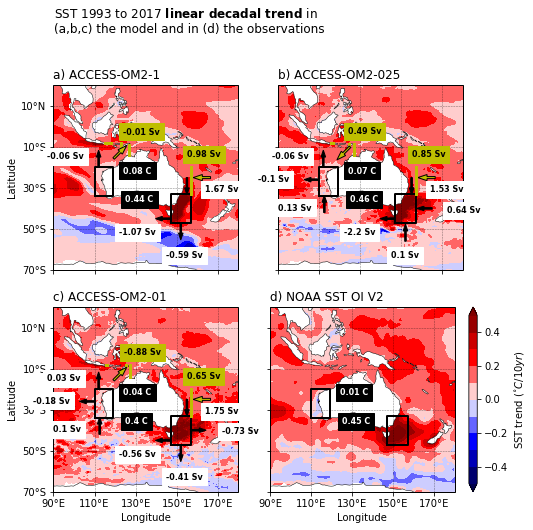

In [38]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=0.5)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-23, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-30, (latS_LC+latN_LC)/2, 
#          str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-30, latS_LC-4, 
#          str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2+3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+7, latN_157E-12, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+15, latN_157E-21, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-12, latN_157E-44, str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
plt.arrow(112, -20, 0, 5, width=0.75, color='k')
# plt.arrow(112.5, -42, 0, 5, width=0.75, color='k')
# plt.arrow(110, -26, -4, 0, width=0.75, color='k')
plt.arrow(125-5.7, -10-5.7, 3.2, 3.2, width=1, facecolor='y', zorder=10)

plt.arrow(155, -25, 0, -5, width=0.75, color='k')
# plt.arrow(157, -40, 4, 0, width=0.75, color='k')
plt.arrow(152, -47, 0, -5, width=0.75, color='k')
plt.arrow(147, -45, -4, 0, width=0.75, color='k')
plt.arrow(166.5, -25, -4, 0, width=1, facecolor='y')



ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-23, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-30, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-20, latS_LC-7, 
         str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2+3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+7, latN_157E-12, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+15, latN_157E-22, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-12, latN_157E-44, str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
plt.arrow(112, -20, 0, 5, width=0.75, color='k')
plt.arrow(112.5, -42, 0, 5, width=0.75, color='k')
plt.arrow(110, -26, -4, 0, width=0.75, color='k')
plt.arrow(125, -10, -3.2, -3.2, width=1, facecolor='y', zorder=10)

plt.arrow(155, -25, 0, -5, width=0.75, color='k')
plt.arrow(165, -40, -4, 0, width=0.75, color='k')
plt.arrow(152, -56, 0, 5, width=0.75, color='k')
plt.arrow(147, -45, -4, 0, width=0.75, color='k')
plt.arrow(166.5, -25, -4, 0, width=1, facecolor='y')


ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-23, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-30, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-20, latS_LC-7, 
         str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2+3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+7, latN_157E-12, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+15, latN_157E-22, str(np.round(-sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-12, latN_157E-44, str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 2)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
plt.arrow(112, -20, 0, 5, width=0.75, color='k')
plt.arrow(112.5, -42, 0, 5, width=0.75, color='k')
plt.arrow(110, -26, -4, 0, width=0.75, color='k')
plt.arrow(125-5.7, -10-5.7, 3.2, 3.2, width=1, facecolor='y', zorder=10)

plt.arrow(155, -25, 0, -5, width=0.75, color='k')
plt.arrow(157, -40, 4, 0, width=0.75, color='k')
plt.arrow(152, -47, 0, -5, width=0.75, color='k')
plt.arrow(147, -45, -4, 0, width=0.75, color='k')
plt.arrow(166.5, -25, -4, 0, width=1, facecolor='y')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2+3, str(np.round(sst_LC_slope*10, 2)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.2
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_final')

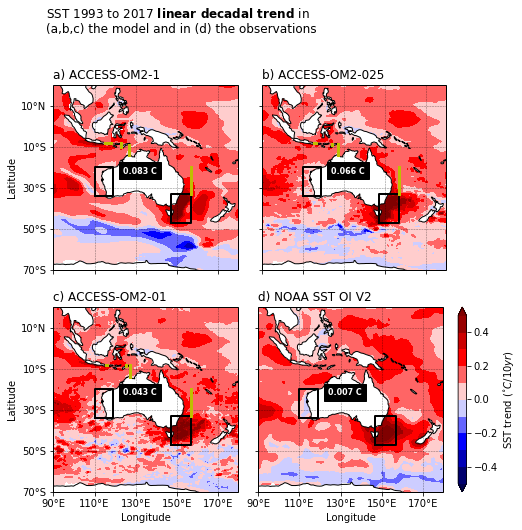

In [103]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
# plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latN_LC+4, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latS_LC-4, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')




ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
# plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latN_LC+4, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latS_LC-4, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
# plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latN_LC+4, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latS_LC-4, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_SST_Leeuwin')

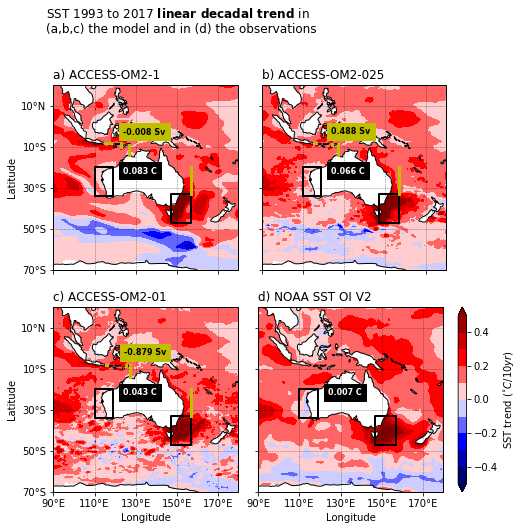

In [105]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latN_LC+4, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latS_LC-4, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')




ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latN_LC+4, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latS_LC-4, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latN_LC+4, 
#          str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
# plt.text(lonW_LC-25, latS_LC-4, 
#          str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#          fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_ITF')

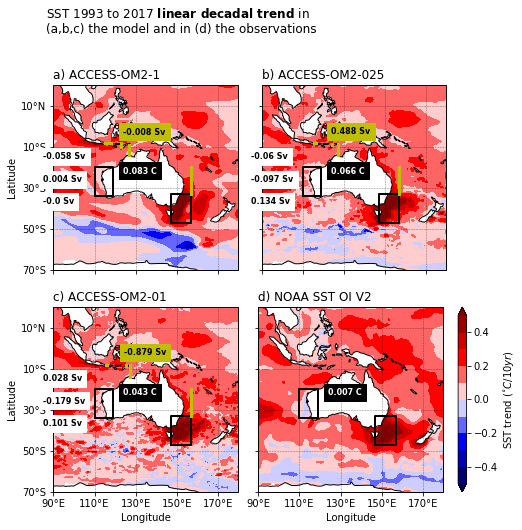

In [106]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')




ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
# plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
#         fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_Leeuwin_sector')

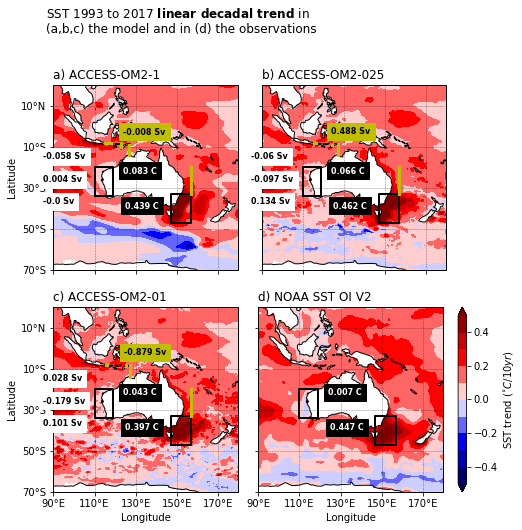

In [107]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')




ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_SST_EAC')

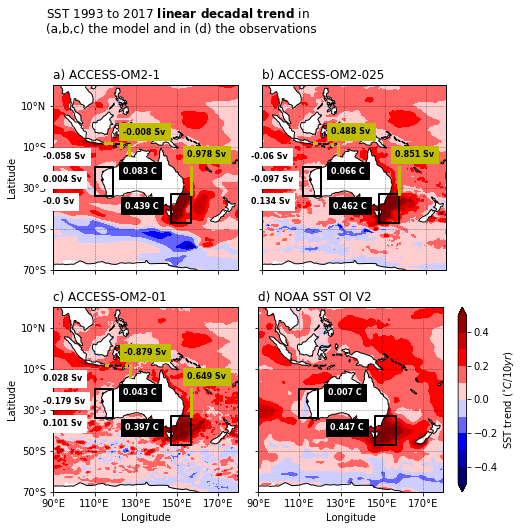

In [108]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')




ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_157E')

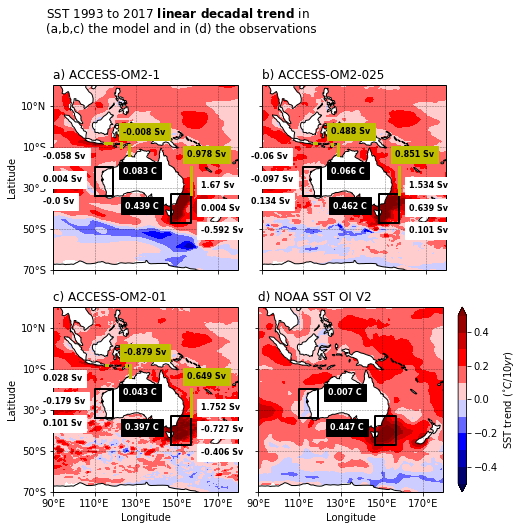

In [109]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')




ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
# sst_LC_slope, _, _, _, _ = \
#         stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
# plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
#         fontsize=8, fontweight='bold', backgroundcolor='w')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_EAC_sector_1')

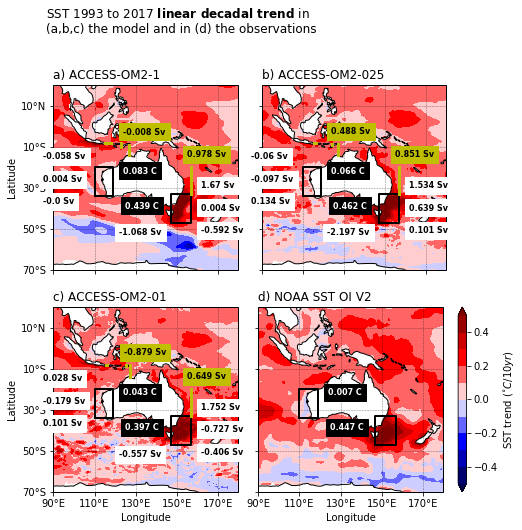

In [110]:
def savefigure(fname):
    output_dir = '/home/561/erd561/figures/Australia/'
    fig_name = nb_name[:-6]
    fig_dir = output_dir + fig_name

    output_ls = os.listdir(output_dir)
    if fig_name not in output_ls:
        os.mkdir(fig_dir) 
    plt.savefig(os.path.join(fig_dir, fig_name[0:4]+fname+'.png'), 
                dpi=300, bbox_inches="tight")


land_50m= cft.NaturalEarthFeature('physical', 'land', '110m',
                                    edgecolor='black',
                                    facecolor='white',
                                    linewidth=1)

# fig = plt.figure(1, figsize=(7.48,9.06)) 
fig = plt.figure(1, figsize=(9.06,7.48)) 
matplotlib.rcParams.update({'font.size': 10})    

plt.suptitle(
    r'SST 1993 to 2017 $\bf{linear\ decadal\ trend}$ in ' +
    '\n(a,b,c) the model and in (d) the observations',
    x=0.2,y=1.025, ha='left')

row=2
col=2

ax = plt.subplot(row, col, 1, projection=ccrs.PlateCarree())
levels=arange(-0.5,0.5,0.1)
cmap = plt.cm.seismic
sst_1_bias = sst_1_slopes_mod.values*10
plt.contourf(sst_1_obs.lon_1+360, sst_1_obs.lat_1, 
             sst_1_bias, 
             levels=levels, extend='both', 
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('a) ACCESS-OM2-1', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
    [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
    [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
    [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
years = np.arange(1993,2018)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_1.sel(year=slice(1993,2017)))
plt.text(straits_1deg['Timor Strait'][1]+360-3, straits_1deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_1.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_1_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_west_1.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')




ax = plt.subplot(row, col, 2, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_025_bias = sst_025_slopes_mod.values*10
plt.contourf(sst_025_obs.lon_025+360, sst_025_obs.lat_025, 
             sst_025_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical', label='SST bias ($^{\circ}C$)')
ax.set_title('b) ACCESS-OM2-025', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
# ax.set_xlabel('Longitude')
ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_025deg['Lombok Strait'][0]+360, straits_025deg['Lombok Strait'][1]+360],
    [straits_025deg['Lombok Strait'][2], straits_025deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Ombai Strait'][0]+360, straits_025deg['Ombai Strait'][1]+360],
    [straits_025deg['Ombai Strait'][2], straits_025deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_025deg['Timor Strait'][0]+360, straits_025deg['Timor Strait'][1]+360],
    [straits_025deg['Timor Strait'][2], straits_025deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_025.sel(year=slice(1993,2017)))
plt.text(straits_025deg['Timor Strait'][1]+360-3, straits_025deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_025.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_025_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_west_025.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')

ax = plt.subplot(row, col, 3, projection=ccrs.PlateCarree())
# levels=arange(0,30,2.5)
# cmap = plt.cm.rainbow
sst_01_bias = sst_01_slopes_mod.values*10
plt.contourf(sst_01_obs.lon_01+360, sst_01_obs.lat_01, 
             sst_01_bias, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
# plt.colorbar(orientation='vertical')
ax.set_title('c) ACCESS-OM2-01', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
ax.set_ylabel('Latitude')
# ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
plt.plot(
    [straits_01deg['Lombok Strait'][0]+360, straits_01deg['Lombok Strait'][1]+360],
    [straits_01deg['Lombok Strait'][2], straits_01deg['Lombok Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Ombai Strait'][0]+360, straits_01deg['Ombai Strait'][1]+360],
    [straits_01deg['Ombai Strait'][2], straits_01deg['Ombai Strait'][3]], 'y', linewidth=3)
plt.plot(
    [straits_01deg['Timor Strait'][0]+360, straits_01deg['Timor Strait'][1]+360],
    [straits_01deg['Timor Strait'][2], straits_01deg['Timor Strait'][3]], 'y', linewidth=3)
plt.plot(
    [lonE_EAC, lonE_EAC],
    [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_ITF_01.sel(year=slice(1993,2017)))
plt.text(straits_01deg['Timor Strait'][1]+360-3, straits_01deg['Timor Strait'][3]+5, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_north_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latN_LC+4, 
         str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_west_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, (latS_LC+latN_LC)/2, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_LC_south_100_01.sel(year=slice(1993,2017)))
plt.text(lonW_LC-25, latS_LC-4, 
         str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
         fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_01_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_line_157E_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-2, latN_157E+5, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='y')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_north_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-10, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_east_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-21, str(np.round(-sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_south_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC+5, latN_157E-32, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, trans_EAC_west_01.sel(year=slice(1993,2017)))
plt.text(lonE_EAC-35, latN_157E-33, str(np.round(sst_LC_slope*10, 3)) + ' Sv', 
        fontsize=8, fontweight='bold', backgroundcolor='w')


ax = plt.subplot(row, col, 4, projection=ccrs.PlateCarree())
# levels=arange(-0.05,0.05,0.01)
# cmap = plt.cm.seismic
plt.contourf(sst_obs.lon+360, sst_obs.lat, 
             sst_slopes_obs*10, 
             levels=levels, extend='both',
             cmap=cmap, transform=ccrs.PlateCarree())
plt.colorbar(orientation='vertical', label='SST trend ($^{\circ}C/10yr$)')
ax.set_title('d) NOAA SST OI V2', loc='left')
ax.set_extent([90, 180, -70, 20], crs=ccrs.PlateCarree())
ax.set_xticks(arange(90, 180, 20), crs=ccrs.PlateCarree())
ax.set_yticks(arange(-70, 20, 20), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_xlabel('Longitude')
# ax.set_xticklabels('')
# ax.set_ylabel('Latitude')
ax.set_yticklabels('')
ax.grid(linewidth=0.5, color='black', alpha=0.5, linestyle='--')
ax.add_feature(land_50m)
plt.plot(
    [lonW_LC, lonE_LC, lonE_LC, lonW_LC, lonW_LC],
    [latS_LC, latS_LC, latN_LC, latN_LC, latS_LC], 'k', linewidth=2)
plt.plot(
    [lonW_EAC, lonE_EAC, lonE_EAC, lonW_EAC, lonW_EAC],
    [latS_EAC, latS_EAC, latN_EAC, latN_EAC, latS_EAC], 'k', linewidth=2)
# plt.plot(
#     [straits_1deg['Lombok Strait'][0]+360, straits_1deg['Lombok Strait'][1]+360],
#     [straits_1deg['Lombok Strait'][2], straits_1deg['Lombok Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Ombai Strait'][0]+360, straits_1deg['Ombai Strait'][1]+360],
#     [straits_1deg['Ombai Strait'][2], straits_1deg['Ombai Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [straits_1deg['Timor Strait'][0]+360, straits_1deg['Timor Strait'][1]+360],
#     [straits_1deg['Timor Strait'][2], straits_1deg['Timor Strait'][3]], 'y', linewidth=3)
# plt.plot(
#     [lonE_EAC, lonE_EAC],
#     [latN_EAC, latN_157E], 'y', linewidth=3)
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_LC.sel(year=slice(1993,2017)))
plt.text(lonE_LC+5, latN_LC-3, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')
sst_LC_slope, _, _, _, _ = \
        stats.linregress(years, sst_EAC.sel(year=slice(1993,2017)))
plt.text(lonW_EAC-22, (latS_EAC+latN_EAC)/2, str(np.round(sst_LC_slope*10, 3)) + ' C', 
        fontsize=8, fontweight='bold', backgroundcolor='k', color='w')


wspace = -0.3
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=None)

savefigure('linear_trans_trend_EAC_sector_2')